<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Adversarial_Examples_Are_Not_Bugs%2C_They_Are_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adversarial Examples Are Not Bugs, They Are Features**

논문 링크: https://arxiv.org/abs/1905.02175

기존의 adversarial example을 주제로 다루는 논문들은 이것을 일종의 'bug'처럼 다루고 이 'bug'을 어떻게 해결할 수 있을지에 대해 연구를 했다. 반면 본 논문은 제목과 같이 **adversarial example을 'bug'가 아닌 일종의 'feature'인 non-robust feature라고 주장**함으로써 바라봄으로써 새로운 시각을 제공한다..

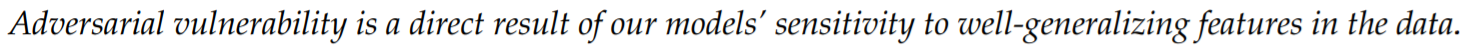

위의 문장과 같이 robust feature에 민감한 인간들과 달리 Nerual Network model의 경우는 data에 존재하는 일반화된 feature에 대해서 잘 학습을 하기 때문에 이런 feature에 민감하게 되고, 이런 feature에 민감하기 때문에 adversarial example이 존재한다는 것이다. 정리하자면 **model은 non-robust feature에도 충분하게 민감하기 때문에 adversarial example에서 충분히 오분류를 잃으킬 수 있다는 것이다.** 

adversarial transferability의 경우에도 위에서 말한 것을 이해했다면 쉽게 납득할 수 있다. adversarial transferability의 특징은 model에서 다른 model로 adversarial example이 전이(transfer)가 되는 것이다. 일반적으로 두 model이 구조 등이 다르더라도 같은 이미지에 대해 학습하기 때문에 이는 곧 비슷한 non-robust feature를 학습하는 것이다. 따라서 non-robust feature를 변경하는 adversarial example은 충분히 공통적으로 여러 모델에 적용이 될 수 있다.

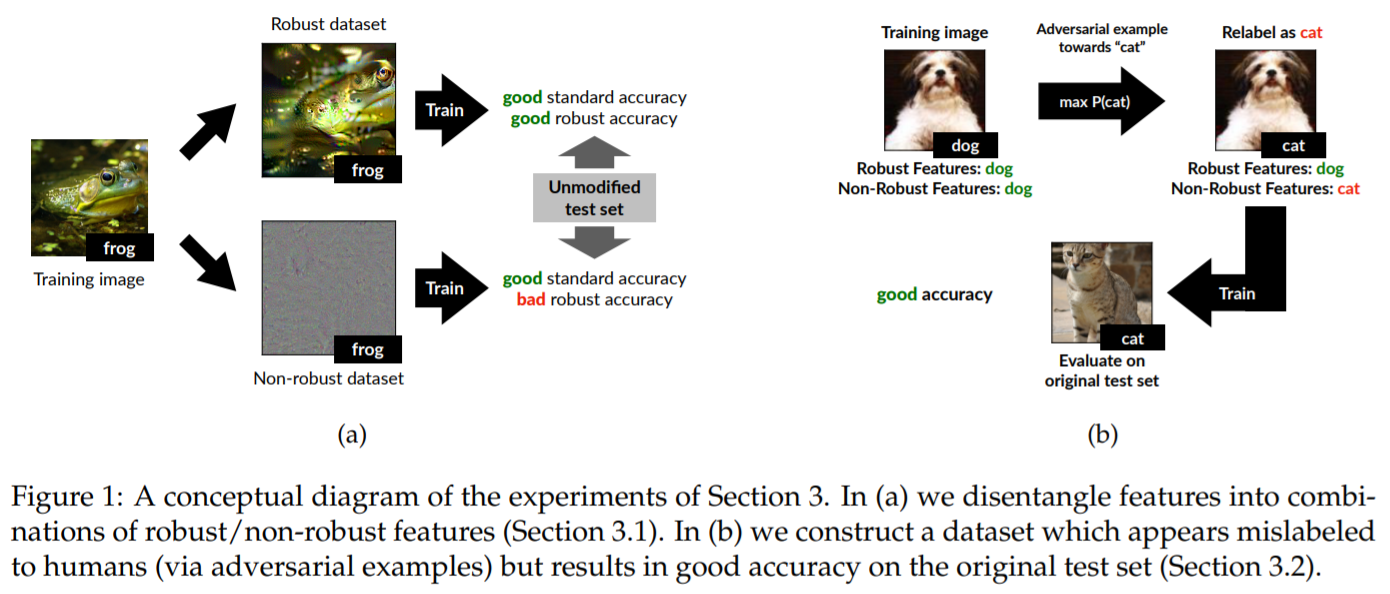

위의 그림 Figure 1을 보면 위에서 한 말을 쉽게 이해할 수 있다. 오른쪽 부분 (b)를 보면 원래 개의 이미지에서 non-robust feature를 cat으로 바꾸는 adversarial example을 만들어 적용시키고 동시에 label을 cat으로 바꾼다. 이처럼 cat의 경우도 non-robust feature를 dog으로 바꾸고 label을 dog으로 바꾼다. (정리하자면, robust feature는 그대로, non-robust feature과 label은 둘다 다른 class의 것으로)

그리고 이를 학습시킨다면 어떻게 될까?
이렇게 되면 model은 non-robust feature에 초점을 두고 판단을 하게 된다. 여기서 재미있는 점은 원래의 데이터에 대해서도 분류를 잘하게 된다는 것이다. 위의 그림 Figure 1애서 (b)의 하단 부분을 보면 original cat의 이미지에 대해서 cat으로 잘 분류를 하는 것을 알 수 있다. 바로 이 부분이 위에서 강조했던 사람의 눈에는 아무렇지 않아 보이는 **non-robust feature가 model에게는 중요한 feature**라는 것을 뒷받침해주는 근거가 된다.

위의 그림 Figure 1에서 (a)를 보면 frog라는 이미지에 대해 Robust feature와 non-robust feature를 뽑고 train을 하였는데, 둘다 일반적인 dataset에 대해서는 좋은 accuracy를 보였줬지만, non-robust feature로 train을 진행한 경우는 adversarial attack에 약한 모습을 보인다.

## **Robust Features && Non-robust Features**

그러면 과연 robust feature과 non-robust featur는 어떻게 구분할 수 있을까??

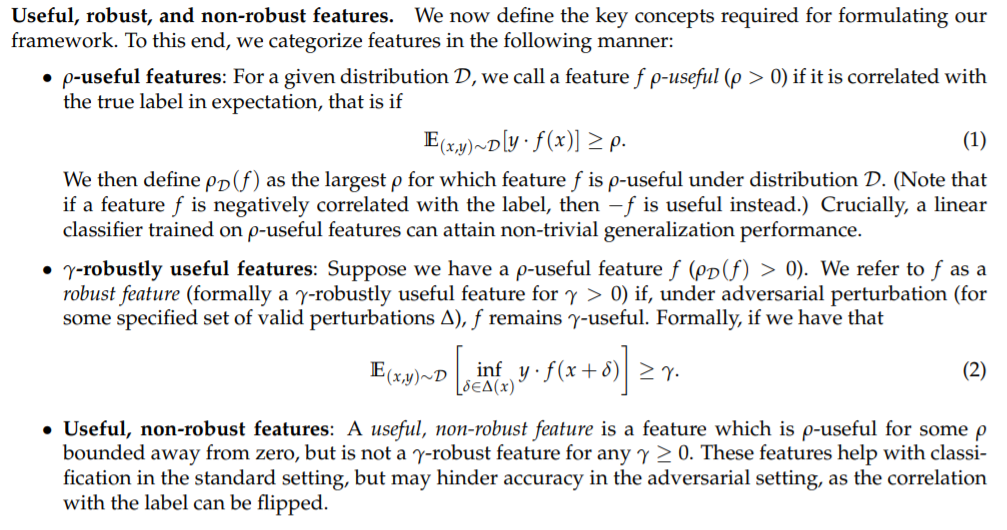

위에서 든 예시를 가져와 보겠다. 그러면 만약 기린과 말을 분류할때 Useful한 feature는 무엇이 있을까? 목의 길이, 털의 색, 다리 길이 등이 있을 수 있다.

이때 목의 길이, 털의 색, 다리 길이 등이 얼마나 useful한지에 대한 지표가 분명 존재할 것이다. 이러한 지표를 위에 나와있다 싶이 **p(useful features)**로 나타낸다.

그리고 이렇게 useful한 feature를 또 robust feature과 non-robust feature로 구분할 수 있다. 어떠한 perturbation이 섞였을때의 값이 여전히 **r(robustly useful features)**보다 크거나 같을 때 이것은 robust-feature이다. 즉, adversarial example이 섞여도 민감하지 않게 반응하는 부분이 robust-feature인 것이다. 

반대로 adversarial example을 섞었을때 feature에 대한 값이 많이 변경이 되어 r이 0보다 작아졌으면 그 값은 non-robust feature라고 볼 수 있다.

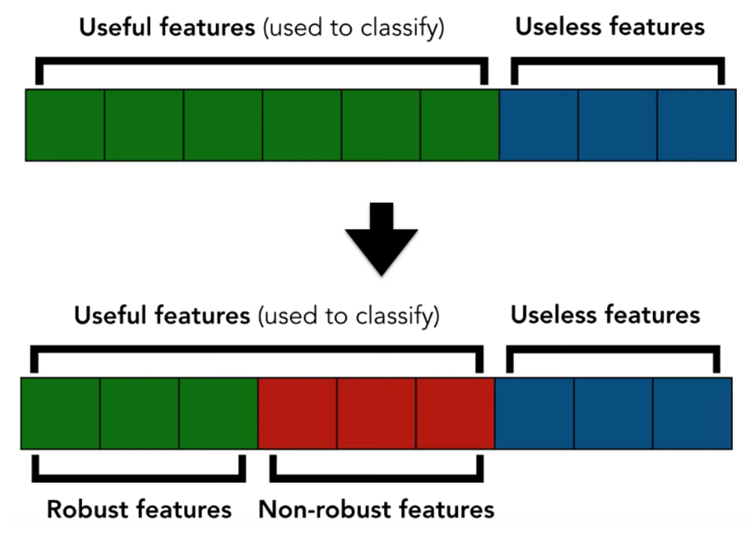

## **Disentangling robust and non-robust features**

이제 위에서 알아본 내용을 기반으로 구체적으로 어떻게 "robustified" dataset을 만들 수 있을지에 대해 알아보겠다.

먼저 robust dataset에 대해 알아보겠다.

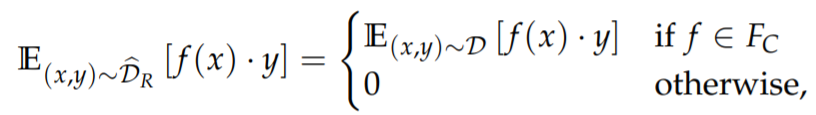

위의 식과 같이 standard train된 model과 adversarial loss를 통해 학습된 model이 있을때, 동일한 feature의 경우는 동일한 값을 가지게하고, 다른 값의 경우는 0을 가지도록 한다. 이를 통해 얻을 수 있는 것이 바로 **robust feature**이다. (물론 실제 학습시에는 동일한 feature만 알 수 있기 때문에 그 외의 feature에 0을 넣는 것은 불가능하다.)

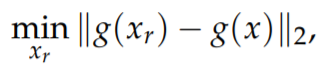

결과적으로 Robust feature은 위와 같은 값을 가진다고 가정했다. 따라서 X(r)의 경우는 **target label이 아닌 다른 label에서 random하게 넣거나 noise data를 넣어** 이를 robust한 data로 바꾸는 작업을 위와 같이 하게 된다. 위의 식을 해석하자면, 초기에 임의의 logic으로 설정한 Xr을 그 target 이미지와 동일한 feature를 가지도록 update하는 것이다.

그리고 Non-robust dataset의 경우는 standard train이 된 모델에 adversarial attack을 가해 만들어진다. 즉, tager label이 아닌 label에서 random하게 뽑은 이미지에 대해 어떤 label로 가게하는 adversarial example을 섞은 것이다.

## **Experiments**

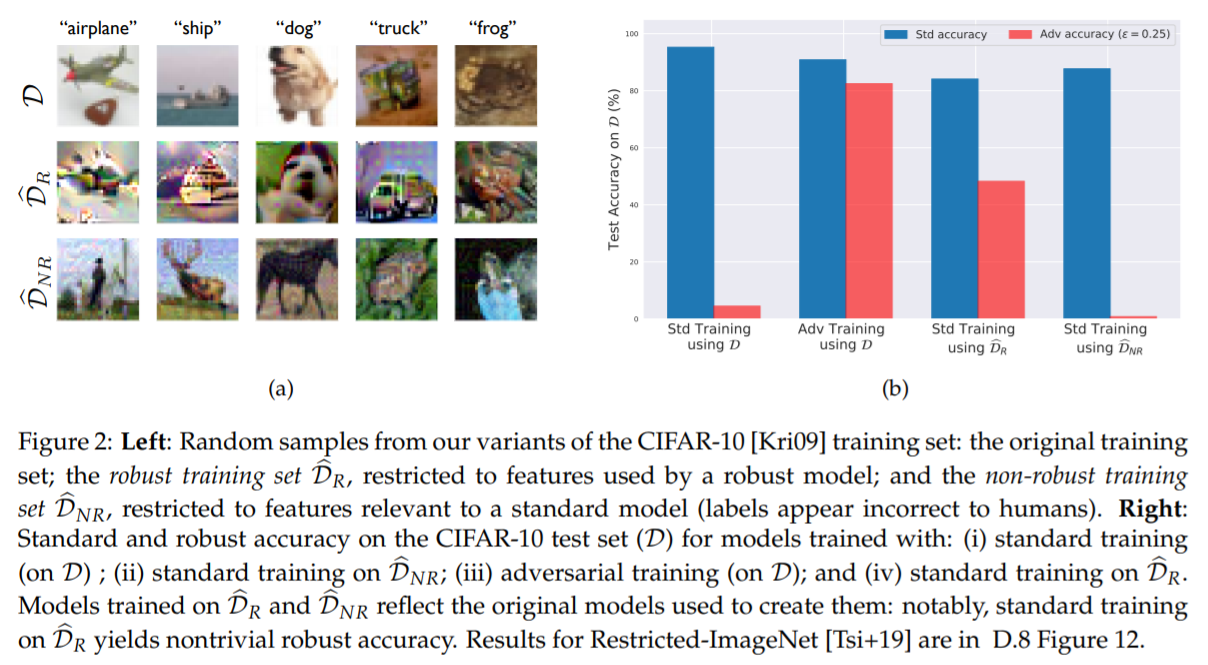

위의 그림 Figure 2에서 왼쪽 부분인 (a)를 보면 아까전에 설명한 것을 쉽게 이해할 수 있다. robust dataset인 D(R)의 경우 무작위의 data에서 위에서 알아본 objective function으로 target label 이미지와 같은 robust-feature를 가진 것이다. (사람 눈으로 봤을때 D와 D(R)이 label에 대한 object가 둘다 들어있다고 판단을 할 수 있다.)

그리고 D(NR)의 경우 standard training이 된 model에서 adversarial attack을 이용해 만든 것이다. 즉, 무작위 data에서 특정 target으로 가는 adversarial example을 섞은 것이다.

정리하면 adversarial training에서 만들어진 robust dataset이 바로 D(R)이고, standard train에서 만들어진 non-robust dataset이 바로 D(NR)이다.

이제 가장 재미있는 점이 바로 위의 그림 Figure의 오른쪽 부분인 (b)이다. 여기서는 좌에서 우 방향을 순서로 각각 일반적인 standard training model, madry가 제안한 adversarial training model 그리고 D(R)으로 standard train을 진행한 model 마지막으로 D(NR)으로 standard train을 진행한 model이다. robust dataset이나 non-robust dataset으로만 train을 진행한 경우도 좋은 accuracy를 보여준다. **하지만, 그냥 dataset으로 train을 한 경우나 non-robust dataset으로 train을 한 경우 adversarial example에 약한 모습을 보여준다.**

논문을 최종 정리하면 본 논문에서는 model이 robust useful feature 뿐만 아니라, 사람이 인지할 수 없는 non-robust useful feature도 사용하여 train을 하기 때문에 adversarial attack에 취약하고 주장한다. **즉, 모델이 아니고 데이터에 문제가 있다는 것이다.**